In [8]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns

In [9]:
data = pd.read_csv('magic04.data', header = None)
data

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [10]:
columns = ['fLength', 'fWidth', 'fSize', 'fConc','fConc1',
                'fAsym','fM3Long','fM3Trans','fAlpha', 'fDist', 'class']
data.columns = columns

________________________________________________________________________________________________
Main_Way to make (Balance_class)

In [11]:
# detect if there is a duplicated row or not
data.duplicated().sum()

115

In [12]:
# count how many number of g (gamma)  and h (hadrons)
data["class"].value_counts()

class
g    12332
h     6688
Name: count, dtype: int64

In [13]:
data.drop_duplicates(inplace = True)

In [14]:
data.duplicated().sum()

0

In [15]:
X, y =  data.drop("class", axis = 1), data["class"]

________________________________________________________________________________________________
Split Data 30/70

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [17]:
y_train.value_counts()

class
g    8632
h    4601
Name: count, dtype: int64

In [18]:
under_sample = RandomUnderSampler(random_state = 42)
X_train_sampled, y_train_sampled = under_sample.fit_resample(X_train, y_train)

Code :

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree_clf=DecisionTreeClassifier(random_state=42)

param_grid = [
    {
        'criterion': ['gini', 'entropy', 'log_loss'],    
        'max_depth': [None, 5, 10, 20],                  
        'min_samples_split': [2, 5, 10],                 
        'min_samples_leaf': [1, 2, 4],                 
        'max_features': [None, 'sqrt', 'log2']           
    }
]

grid_search = GridSearchCV(tree_clf , param_grid , cv=5)

grid_search.fit(X_train_sampled,y_train_sampled)




GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [None, 5, 10, 20],
                          'max_features': [None, 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10]}])

In [22]:
tree_clf=grid_search.best_estimator_

Visualization :

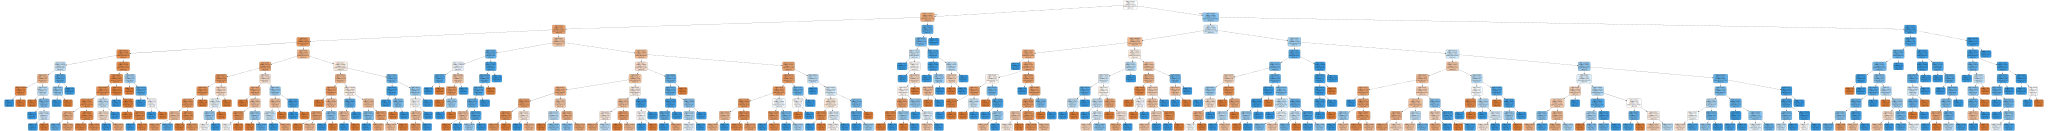

In [23]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="tree.dot",
    class_names=['g', 'h'], 
    rounded=True,
    filled=True
)

from graphviz import Source

Source.from_file("tree.dot")


Performance :

In [24]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix

predict_class = tree_clf.predict(X_test)

accuracy = accuracy_score(y_test, predict_class)
print("Test Accuracy:", accuracy)

print("Predicted classes:")
print(predict_class)


precision = precision_score(y_test, predict_class, pos_label='g')
print("Precision:", precision)

recall = recall_score(y_test, predict_class, pos_label='g')
print("Recall:", recall)

f1 = f1_score(y_test, predict_class, pos_label='g')
print("F1 Score:", f1)

#before grid
#Test Accuracy: 0.7782087447108603
#Predicted classes:
#['h' 'g' 'g' ... 'h' 'h' 'h']
#Precision: 0.8671076368009621
#Recall: 0.7794594594594595
#F1 Score: 0.820950754341019

Test Accuracy: 0.8316290550070522
Predicted classes:
['h' 'g' 'g' ... 'h' 'h' 'g']
Precision: 0.8710462287104623
Recall: 0.8708108108108108
F1 Score: 0.8709285038518719


________________________________________________________________________________________________
RandomForest

Training

In [35]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rnd_clf, param_grid, cv=5, scoring='accuracy', n_jobs = -1)

grid_search.fit(X_train_sampled, y_train_sampled)

print("Best parameters:", grid_search.best_params_)

best_tree_model = grid_search.best_estimator_


KeyboardInterrupt: 

In [ ]:
import joblib
joblib.dump(best_tree_model, 'best_random_forest_model.pkl')

In [ ]:
loaded_model = joblib.load('best_random_forest_model.pkl')

Performance

In [111]:
predict_class = best_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, predict_class)
print("Test Accuracy:", accuracy)

print("Predicted classes:")
print(predict_class)

cm = confusion_matrix(y_test, predict_class)
print("Confusion Matrix:")
print(cm)

precision = precision_score(y_test, predict_class, pos_label='g')
print("Precision:", precision)

recall = recall_score(y_test, predict_class, pos_label='g')
print("Recall:", recall)

f1 = f1_score(y_test, predict_class, pos_label='g')
print("F1 Score:", f1)

#Test Accuracy: 0.8651269393511989
#Predicted classes:
#['h' 'g' 'g' ... 'h' 'h' 'g']
#Confusion Matrix:
#[[3269  431]
# [ 334 1638]]
#Precision: 0.9072994726616709
#Recall: 0.8835135135135135
#F1 Score: 0.8952485280021909

Test Accuracy: 0.8651269393511989
Predicted classes:
['h' 'g' 'g' ... 'h' 'h' 'g']
Confusion Matrix:
[[3269  431]
 [ 334 1638]]
Precision: 0.9072994726616709
Recall: 0.8835135135135135
F1 Score: 0.8952485280021909


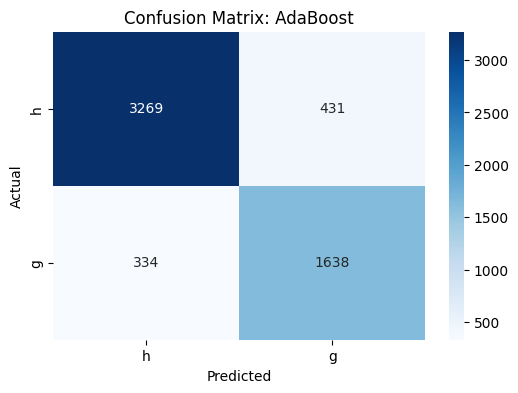

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict_class)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['h', 'g'], yticklabels=['h', 'g'])
plt.title('Confusion Matrix: AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

________________________________________________________________________________________________
Naïve Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6] 
}

grid_search = GridSearchCV(nb_clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_sampled,y_train_sampled)

nb_clf=grid_search


100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


performace

In [109]:
predict_class = nb_clf.predict(X_test)

accuracy = accuracy_score(y_test, predict_class)
print("Test Accuracy:", accuracy)

print("Predicted classes:")
print(predict_class)

cm = confusion_matrix(y_test, predict_class)
print("Confusion Matrix:")
print(cm)

precision = precision_score(y_test, predict_class, pos_label='g')
print("Precision:", precision)

recall = recall_score(y_test, predict_class, pos_label='g')
print("Recall:", recall)

f1 = f1_score(y_test, predict_class, pos_label='g')
print("F1 Score:", f1)

Test Accuracy: 0.7230253878702397
Predicted classes:
['g' 'g' 'g' ... 'g' 'h' 'g']
Confusion Matrix:
[[3306  394]
 [1177  795]]
Precision: 0.7374525987062235
Recall: 0.8935135135135135
F1 Score: 0.8080166198215814


________________________________________________________________________________________________
AdaBoost

In [110]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

ada_clf = AdaBoostClassifier(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],          
    'learning_rate': [0.01, 0.1, 1.0],       
}


grid_search_ada = GridSearchCV(ada_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_ada.fit(X_train_sampled, y_train_sampled)


print("Best parameters for AdaBoost:", grid_search_ada.best_params_)


best_ada_model = grid_search_ada.best_estimator_
predict_class = best_ada_model.predict(X_test)


accuracy = accuracy_score(y_test, predict_class)
print("Test Accuracy:", accuracy)

print("Predicted classes:")
print(predict_class)

cm = confusion_matrix(y_test, predict_class)
print("Confusion Matrix:")
print(cm)

precision = precision_score(y_test, predict_class, pos_label='g')
print("Precision:", precision)

recall = recall_score(y_test, predict_class, pos_label='g')
print("Recall:", recall)

f1 = f1_score(y_test, predict_class, pos_label='g')
print("F1 Score:", f1)

Best parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 200}
Test Accuracy: 0.8051833568406206
Predicted classes:
['h' 'g' 'g' ... 'g' 'h' 'g']
Confusion Matrix:
[[2948  752]
 [ 353 1619]]
Precision: 0.8930627082702212
Recall: 0.7967567567567567
F1 Score: 0.8421654049421511



Model Comparison:
           Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.778209   0.867108  0.779459  0.820951
1  Random Forest  0.865127   0.907299  0.883514  0.895249
2    Naïve Bayes  0.723025   0.737453  0.893514  0.808017
3       AdaBoost  0.805183   0.893063  0.796757  0.842165


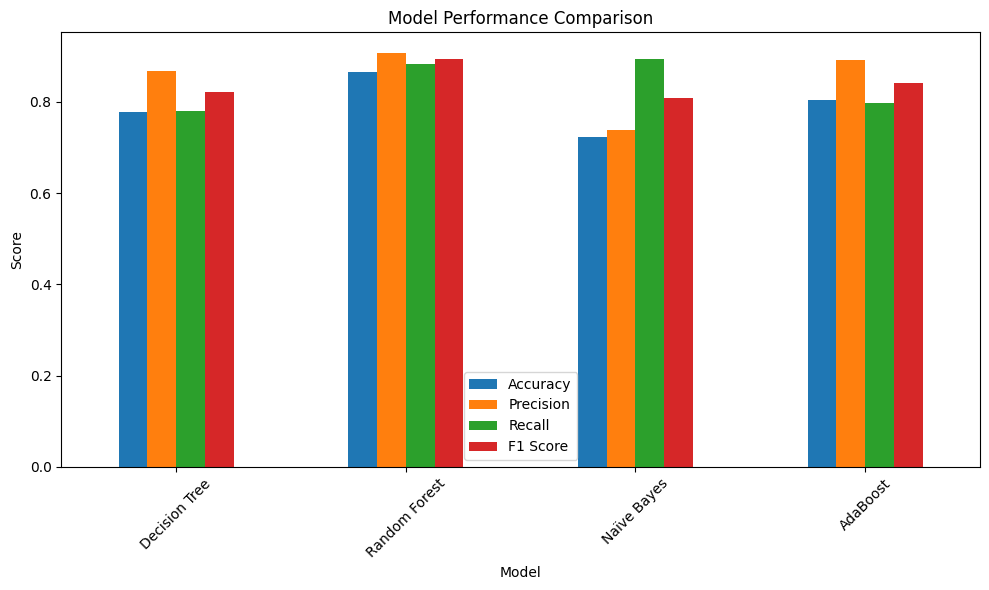

In [ ]:
results = {
    'Model': ['Decision Tree', 'Random Forest', 'Naïve Bayes', 'AdaBoost'],
    'Accuracy': [
        accuracy_score(y_test, tree_clf.predict(X_test)),
        accuracy_score(y_test, best_tree_model.predict(X_test)),
        accuracy_score(y_test, nb_clf.predict(X_test)),
        accuracy_score(y_test, best_ada_model.predict(X_test))
    ],
    'Precision': [
        precision_score(y_test, tree_clf.predict(X_test), pos_label='g'),
        precision_score(y_test, best_tree_model.predict(X_test), pos_label='g'),
        precision_score(y_test, nb_clf.predict(X_test), pos_label='g'),
        precision_score(y_test, best_ada_model.predict(X_test), pos_label='g')
    ],
    'Recall': [
        recall_score(y_test, tree_clf.predict(X_test), pos_label='g'),
        recall_score(y_test, best_tree_model.predict(X_test), pos_label='g'),
        recall_score(y_test, nb_clf.predict(X_test), pos_label='g'),
        recall_score(y_test, best_ada_model.predict(X_test), pos_label='g')
    ],
    'F1 Score': [
        f1_score(y_test, tree_clf.predict(X_test), pos_label='g'),
        f1_score(y_test, best_tree_model.predict(X_test), pos_label='g'),
        f1_score(y_test, nb_clf.predict(X_test), pos_label='g'),
        f1_score(y_test, best_ada_model.predict(X_test), pos_label='g')
    ]
}

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()